<a href="https://colab.research.google.com/github/anapaulaw/TRABALHOS_EM_PYTHON/blob/main/ESTUDO_SOBRE_DOEN%C3%87AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORANDO BANCO DE DADOS DE PACIENTES 

IMPORTANDO BIBLIOTECAS 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CARREGANDO BANCO DE DADOS

In [ ]:

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


A variavél resposta que queremos explorar é a variavém **num** que esta distribuida em valores 0 para pacientes saudaveis , 1 , 2 , 3 para pacientes que apresentaram alguma alteração no exame porém vamos fazer uma nova variavél e categoriza-la somente em pacientes saudaveis e doentes . E ssa nova variavel se chama **flag_doente**.

In [ ]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


# **AVALIANDO OS PACIENTES POR SEXO**

# CATEGORIZANDO AS VARIAVEIS SEXO E DOENTE

In [ ]:
df['sex'] = df['sex'].map({1: 'homem', 0: 'Mulher'})


In [ ]:
df['flag_doente'] = df['flag_doente'].map({1: 'doente', 0: 'saudavel'})

# QUANTIDADE DE DOENTES E SAUDAVEIS POR SEXO 




In [ ]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab

flag_doente,doente,saudavel,All
sex,,,
Mulher,25,72,97
homem,114,92,206
All,139,164,303


Construimos uma tabela para verificar a distribuição de pessoas doentes e saudaveis por sexo. Podemos notar que temos mais homens doentes do que mulheres nesse conjunto de dados. De 139 de totall de doentes 114 ão homens .

# QUANTIDADE MÉDIA DE DOENTES 

In [ ]:
df['flag_doente'].value_counts()

saudavel    164
doente      139
Name: flag_doente, dtype: int64

# ODDS

Em Probabilidade e Estatística, a chance (em inglês: odds) de ocorrência de um evento é a probabilidade de ocorrência deste evento dividida pela probabilidade da não ocorrência do mesmo evento.

In [ ]:
tab['chance'] = tab['doente']/tab['saudavel']
tab 

flag_doente,doente,saudavel,All,chance
sex,,,,
Mulher,25,72,97,0.347222
homem,114,92,206,1.239130
All,139,164,303,0.847561


In [ ]:
1.23/0.34

3.617647058823529

Conforme resultado da tabela acima temos que a probabilidade de um homem ter a doença é maior que a mulher . Se dividimos a chance do homem pela chance da mulher encontramos que a chance de um homem está doente é 3 vezes maior do que uma mulher esta doente.

# ODDS RATIO


A razão de chances ou razão de possibilidades (em inglês: odds ratio; abreviatura O.R.) é definida como a razão entre a chance de um evento ocorrer em um grupo e a chance de ocorrer em outro grupo. Chance ou possibilidade é a probabilidade de ocorrência deste evento dividida pela probabilidade da não ocorrência do mesmo evento. Esses grupos podem ser, por exemplo, amostras de pessoas com ou sem uma doença, no qual se quer medir a chance dessa pessoa ter sido exposta a um determinado agente ambiental; ou grupos/amostras para análise estatística, como homens e mulheres, tratados e não tratados, etc.

In [ ]:
tab.loc['homem', 'chance']

1.2391304347826086

In [ ]:
tab['RC_Mulher_vs_homem']= tab['chance']/tab.loc['homem', 'chance']
tab 

flag_doente,doente,saudavel,All,chance,RC_Mulher_vs_homem
sex,,,,,
Mulher,25,72,97,0.347222,0.280214
homem,114,92,206,1.239130,1.000000
All,139,164,303,0.847561,0.683997


Uma razão de chances maior do que 1 indica que a condição ou evento tem maior probabilidade de ocorrer no primeiro grupo ou seja no grupo masculino.

# **AVALIANDO OS PACIENTES POR IDADE**











# CATEGORIZANDO AS VARIAVEIS

Os dados serão divididos em 5 calsses 


29-38
39-48
49-58
59-68
69-77


In [ ]:
idade = pd.DataFrame(df, columns=["age"])

In [ ]:
idade.head()

,age
0,63.0
1,67.0
2,67.0
3,37.0
4,41.0


In [ ]:
classes = [0,39,49,59,69,77]

In [ ]:
labels = ['A', 'B' , 'C' , 'D' , 'E']

In [ ]:
classes = pd.cut(x=idade.age, bins=classes, labels=labels)

# VISUALIZANDO AS CLASSES

In [ ]:
idade['Classe'] = classes
idade.head()

,age,Classe
302,38.0,A
211,38.0,A
82,39.0,A
3,37.0,A
283,35.0,A


# COLOCANDO A CLASSE  EM ORDEM

In [ ]:
idade = idade.sort_values('Classe')


# COMO OS DADOS ESTÃO DISTRIBUIDOS ENTRE AS CLASSES

In [ ]:
pd.value_counts(idade.Classe)

C    125
D     81
B     72
A     15
E     10
Name: Classe, dtype: int64

Podemos notar que a classe que apresenta um maior número de pacientes é a classe C que são pacientes de 49 a 58 anos e a menor classe é a classe E com 10 pacientes com idade de 69 a 77 . A seguir vamos dividir as classes em pacientes doentes e saudaveis para saber qual grupo tem maior incidencia da doença.

# QUANTIDADE DE DOENTES E SAUDAVEIS POR CLASSE DE IDADE

In [ ]:
tab = pd.crosstab(idade['Classe'], df['flag_doente'], margins= True)
tab

flag_doente,doente,saudavel,All
Classe,,,
A,4,11,15
B,22,50,72
C,60,65,125
D,49,32,81
E,4,6,10
All,139,164,303


Podemos notar uma maior concentração de pacientes doentes na classe C que se refere a pacientes com 49 a 58 anos.

# MÉDIA DA VARIÁVEL AGE

In [ ]:
df['age'].mean()

54.43894389438944

Média de idade dos pacientes.

# QUANTIDADE MÉDIA DE DOENTES

In [ ]:
df['flag_doente'].value_counts()

saudavel    164
doente      139
Name: flag_doente, dtype: int64

# ODDS

In [ ]:
tab['chance'] = tab['doente']/tab['saudavel']
tab 

flag_doente,doente,saudavel,All,chance
Classe,,,,
A,4,11,15,0.363636
B,22,50,72,0.440000
C,60,65,125,0.923077
D,49,32,81,1.531250
E,4,6,10,0.666667
All,139,164,303,0.847561


# ODDS RATIO

In [ ]:
tab.loc['A', 'chance']

0.36363636363636365

A chance de esta doente e pertencer ao grupo A é de 36%.

In [ ]:
tab['RC_A_vs_B']= tab['chance']/tab.loc['A', 'chance']
tab 

flag_doente,doente,saudavel,All,chance,RC_A_vs_B
Classe,,,,,
A,4,11,15,0.363636,1.000000
B,22,50,72,0.440000,1.210000
C,60,65,125,0.923077,2.538462
D,49,32,81,1.531250,4.210938
E,4,6,10,0.666667,1.833333
All,139,164,303,0.847561,2.330793


A maior chance de doentes aparece nos grupos C e D .

# GRÁFICO HISTOGRAMA COM A DISTRIBUIÇÃO DAS IDADES

In [ ]:
%matplotlib inline

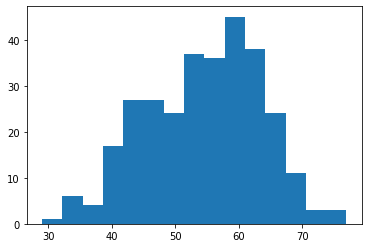

In [ ]:
idade['age'].fillna(idade['age'].mean(), inplace=True)
histogram_example = plt.hist(idade['age'], bins=15)
plt.show()

Podemos ver através do histograma acima a distribuição de idades dos pacientes podemos ver uma maior concentração de idade entre 50 a 65 anos.

**ANA PAULA VANDERLEY**

ESPECIALISTA EM ESTATÍSTICA

SALVADOR - BA 

08-2022 